In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [21]:
train = pd.read_csv('01_raw_data/facies_vectors.csv')


In [22]:
cols = train.columns.values

    #There are 4149 elements, and PE has a significant amount of missing values

In [23]:
well_PE_Miss = train.loc[train["PE"].isnull(),"Well Name"].unique()
well_PE_Miss

array(['ALEXANDER D', 'KIMZEY A', 'Recruit F9'], dtype=object)

In [24]:
train.loc[train["Well Name"] == well_PE_Miss[0]].count()
train.loc[train["Well Name"] == well_PE_Miss[1]].count()

Facies       439
Formation    439
Well Name    439
Depth        439
GR           439
ILD_log10    439
DeltaPHI     439
PHIND        439
PE             0
NM_M         439
RELPOS       439
dtype: int64

    The two wells have all PE missed

In [25]:
(train.groupby("Well Name"))["PE"].mean()
(train.groupby("Well Name"))["PE"].median()

Well Name
ALEXANDER D           NaN
CHURCHMAN BIBLE    3.7400
CROSS H CATTLE     3.2010
KIMZEY A              NaN
LUKE G U           3.6000
NEWBY              3.7000
NOLAN              3.5980
Recruit F9         5.3715
SHANKLE            3.1000
SHRIMPLIN          4.0000
Name: PE, dtype: float64

In [26]:
train["PE"] = train["PE"].fillna(train["PE"].median())
print(train.loc[train["Well Name"] == "CHURCHMAN BIBLE","PE"].mean())
print(train.loc[train["Well Name"] == "CHURCHMAN BIBLE","PE"].median())
print((train.groupby("Well Name"))["PE"].median()) ## QC for the fill in
print(train.loc[train["Well Name"] == "CHURCHMAN BIBLE","PE"].mean())
print(train.loc[train["Well Name"] == "CHURCHMAN BIBLE","PE"].median())
plt.show()

3.789925742574257
3.74
Well Name
ALEXANDER D        3.5515
CHURCHMAN BIBLE    3.7400
CROSS H CATTLE     3.2010
KIMZEY A           3.5515
LUKE G U           3.6000
NEWBY              3.7000
NOLAN              3.5980
Recruit F9         5.3000
SHANKLE            3.1000
SHRIMPLIN          4.0000
Name: PE, dtype: float64
3.789925742574257
3.74


     The PE of all wells have no strong variance; For now, fillin the Missing value of median

    Fancy visualization from forum

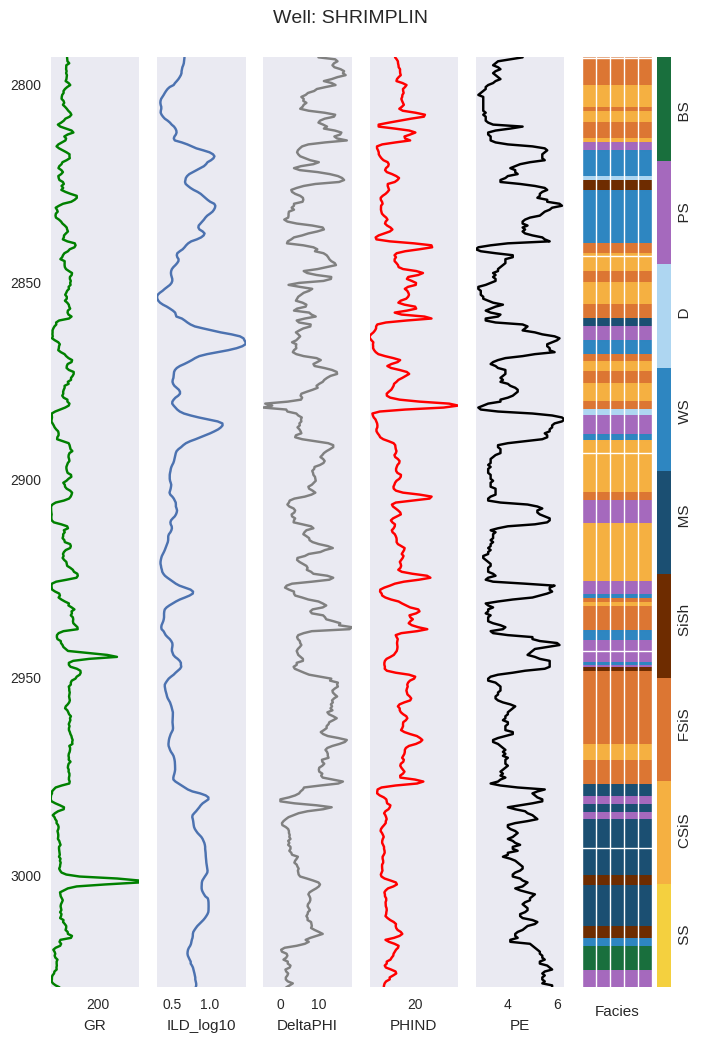

In [27]:
features = ['GR', 'ILD_log10', 'DeltaPHI', 
    'PHIND','PE','NM_M', 'RELPOS']
feature_vectors = train[features]
facies_labels = train['Facies']
## 1=sandstone  2=c_siltstone   3=f_siltstone 
## 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
## 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
train.loc[:,'FaciesLabels'] = train.apply(lambda row: label_facies(row, facies_labels), axis=1)
#

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.Depth, '-g')
    ax[1].plot(logs.ILD_log10, logs.Depth, '-')
    ax[2].plot(logs.DeltaPHI, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.PHIND, logs.Depth, '-', color='r')
    ax[4].plot(logs.PE, logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((17*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.ILD_log10.min(),logs.ILD_log10.max())
    ax[2].set_xlabel("DeltaPHI")
    ax[2].set_xlim(logs.DeltaPHI.min(),logs.DeltaPHI.max())
    ax[3].set_xlabel("PHIND")
    ax[3].set_xlim(logs.PHIND.min(),logs.PHIND.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PE.min(),logs.PE.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

make_facies_log_plot(
    train[train['Well Name'] == 'SHRIMPLIN'],
    facies_colors)
plt.show()

In [28]:
## Investigate the dependencies of the depth feature and Facies
wells = train["Well Name"].unique()
#train.plot(x = "Depth", y = "Facies")
#plt.show()
pi = 0
for well in wells:
    pi = pi + 1 # Plot index
    ax = plt.subplot(3, 4, pi)
    depthi = train.loc[train["Well Name"] == well, "Depth"].values
    faci = train.loc[train["Well Name"] == well, "Facies"].values
    plt.plot(faci,depthi)
    ax.set_title(well)

In [29]:
## Create dummy variables for Well Name, Formation, which may have geologic or geospatial information
train_dummy = pd.get_dummies(train[["Formation"]])
train_dummy.describe()
cols_dummy = train_dummy.columns.values
train[cols_dummy] = train_dummy[cols_dummy]
print(len(cols_dummy))

14


In [30]:
   ## For trainning drop Formation, FaciesLabels Leave Well Name for Later group splitting
wellgroups = train["Well Name"].values
train_inp = train.drop(["Formation","Well Name",'FaciesLabels'],axis =1)
train_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 23 columns):
Facies             4149 non-null int64
Depth              4149 non-null float64
GR                 4149 non-null float64
ILD_log10          4149 non-null float64
DeltaPHI           4149 non-null float64
PHIND              4149 non-null float64
PE                 4149 non-null float64
NM_M               4149 non-null int64
RELPOS             4149 non-null float64
Formation_A1 LM    4149 non-null float64
Formation_A1 SH    4149 non-null float64
Formation_B1 LM    4149 non-null float64
Formation_B1 SH    4149 non-null float64
Formation_B2 LM    4149 non-null float64
Formation_B2 SH    4149 non-null float64
Formation_B3 LM    4149 non-null float64
Formation_B3 SH    4149 non-null float64
Formation_B4 LM    4149 non-null float64
Formation_B4 SH    4149 non-null float64
Formation_B5 LM    4149 non-null float64
Formation_B5 SH    4149 non-null float64
Formation_C LM     4149 non-null flo

    ### Build up Initial Test Loop for model and feature engineering : Test 1 SVC

In [31]:
from sklearn.model_selection import LeavePGroupsOut
X = train_inp.drop(["Facies","Depth"],axis = 1).values
y = train_inp["Facies"].values
lpgo = LeavePGroupsOut(n_groups=2)
split_no = lpgo.get_n_splits(X,y,wellgroups)

## Bad indicator of model performance. It means no accurate prediction was found in one class  


#/home/computer/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
#'precision', 'predicted', average, warn_for)

In [32]:
svc_b1 = SVC(C =1, gamma = 0.001, kernel = 'rbf')
svc_b1.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
test = pd.read_csv('01_raw_data/validation_data_nofacies.csv')
test.count()

Formation    830
Well Name    830
Depth        830
GR           830
ILD_log10    830
DeltaPHI     830
PHIND        830
PE           830
NM_M         830
RELPOS       830
dtype: int64

In [34]:
test["Formation"].unique()

array(['A1 SH', 'A1 LM', 'B1 SH', 'B1 LM', 'B2 SH', 'B2 LM', 'B3 SH',
       'B3 LM', 'B4 SH', 'B4 LM', 'B5 SH', 'B5 LM', 'C SH', 'C LM'], dtype=object)

In [35]:
test_dummy = pd.get_dummies(test[["Formation"]])
test_cols_dummy = test_dummy.columns.values
test[test_cols_dummy] = test_dummy[cols_dummy]
test_inp = test.drop(["Formation","Well Name"],axis =1)
X_test = test_inp.drop(["Depth"],axis = 1).values

In [36]:
svc_b1.predict(X_test)
test = test.drop(test_cols_dummy,axis = 1)
test["Facies"] = svc_b1.predict(X_test)

In [37]:
test.to_csv("Houston_J_sub_1.csv")